## Mixed nanoparticle 4D-STEM data analysis
For MSE 466:  Analytical Electron Microscopy at Northwestern University 

Instructors: Vinayak P. Dravid, Roberto dos Reis

TAs: Matthew Cheng, Stephanie Ribet

Data available on [google drive](https://drive.google.com/drive/folders/1pPro_doWplOZ58Z2C2ceV6pqVDFcoIun?usp=sharing).

More information available from the [VPD Group](https://vpd.ms.northwestern.edu/) and [NU*ANCE* Center](http://www.nuance.northwestern.edu/)

In [34]:
#load  packages
%matplotlib nbagg

import matplotlib.pyplot as plt
import numpy as np 
from skimage import feature
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import h5py

In [35]:
#load data fom h5 file (already binned)
hf = h5py.File('NP_data.h5', 'r')
data=hf['data'][:]
scale=hf['scale'][0]
hf.close()

data=np.array(data)

In [36]:
hf.close()

In [37]:
meanCBED=np.mean(data, axis=(0,1))

<IPython.core.display.Javascript object>


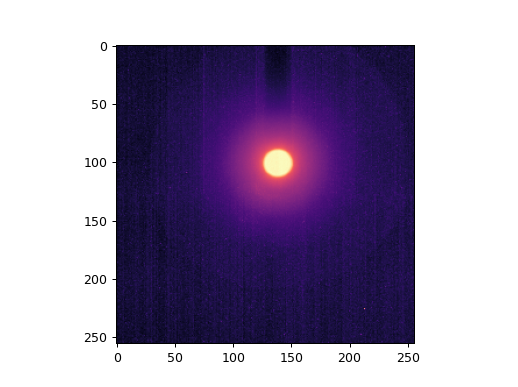

In [38]:
fig, ax = plt.subplots()
ax.imshow(meanCBED**0.1, cmap='magma')
plt.show()

In [41]:
#diffraction space is  too big! Let's crop...

NP_data=data[:,:,40:-80,70:-50]

In [42]:
meanCBED2=np.mean(NP_data, axis=(0,1))

<IPython.core.display.Javascript object>


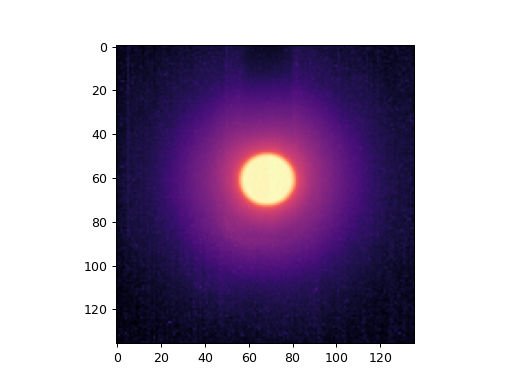

In [43]:
fig, ax = plt.subplots()
ax.imshow(meanCBED2**0.1, cmap='magma')
plt.show()

<IPython.core.display.Javascript object>


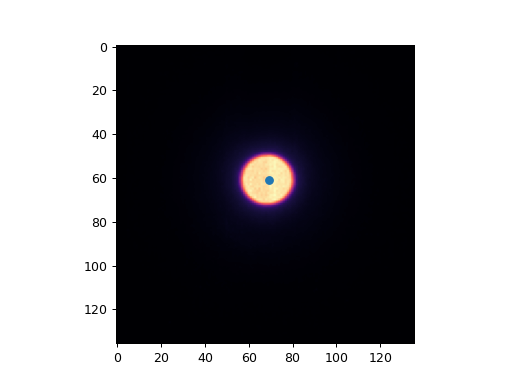

ic is [61.]
jc is [69.]


In [44]:
#find center of DP

blob=feature.blob_log(meanCBED2, threshold=50) #use scikit tool

fig, ax = plt.subplots()
ax.imshow(meanCBED2, cmap='magma')
ax.scatter(blob[:,1], blob[:,0])
plt.show()

ic=blob[:,0]
jc=blob[:,1]

print("ic is " + str(ic))
print("jc is " + str(jc))

<IPython.core.display.Javascript object>


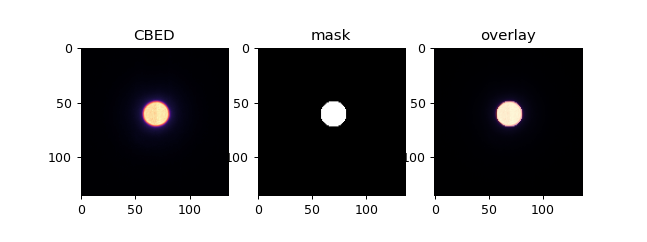

In [45]:
#create BF image

#create mask
x, y = np.indices((meanCBED2.shape[0], meanCBED2.shape[1]))
mask_BF = (x - ic) ** 2 + (y-jc) ** 2 < 12 ** 2

#plot mask to check alignment 
fig, ax = plt.subplots(ncols=3, figsize=(8,3))
ax[0].imshow(meanCBED2, cmap='magma')
ax[1].imshow(mask_BF, cmap='gray')

ax[2].imshow(meanCBED2, cmap='magma')
ax[2].imshow(mask_BF, cmap='gray', alpha=0.5)

ax[0].set_title('CBED')
ax[1].set_title('mask')
ax[2].set_title('overlay')
plt.show()

<IPython.core.display.Javascript object>


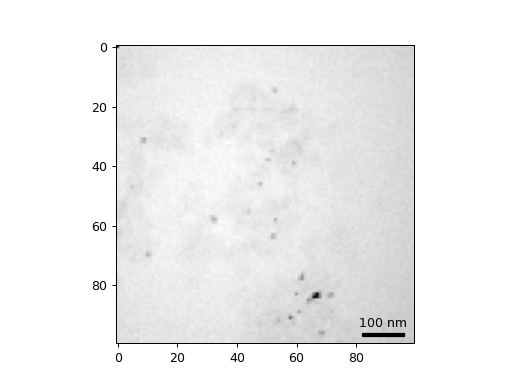

In [46]:
#initalize BF image by creating an empty array (an array filled with zeros)
BF=np.zeros((NP_data.shape[0],NP_data.shape[1]))

#integrate diffraction space to create BF image
for i in range(0,int(NP_data.shape[2])):
    for j in range(0,int(NP_data.shape[3])):
        if mask_BF[i,j]:
            BF=BF+NP_data[:,:,i,j]
            
#plot BF image 
fig,ax=plt.subplots()
ax.imshow(BF, cmap=plt.cm.gray)


#add scale bar
barsize =0.1/(scale*NP_data.shape[0]) 
scalebar = AnchoredSizeBar(transform=ax.transAxes, size=barsize, loc=4, label='100 nm',label_top='true',
                           borderpad=0.5, color='black', size_vertical=0.01, frameon=False)

ax.add_artist(scalebar)
    
    
#ax.axis('off') #uncomment to remove x and y axis tick marks
#plt.savefig('BF.png',dpi=150, bbox_inches='tight', pad_inches=0.1) uncomment to save image to working directory
plt.show()

<IPython.core.display.Javascript object>


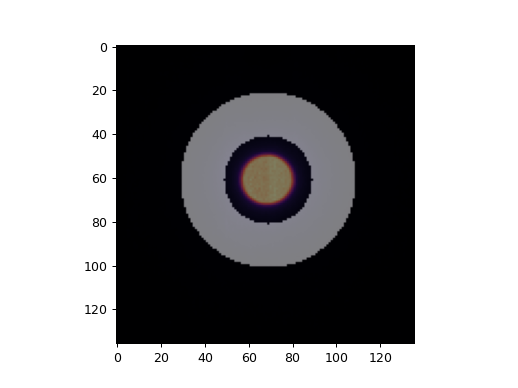

<IPython.core.display.Javascript object>


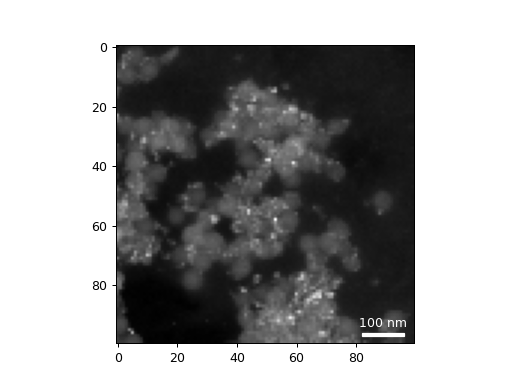

In [50]:
#create DF image

#create DF mask
mask1 = (x - ic) ** 2 + (y-jc) ** 2 > 20 ** 2 #inner diameter 
mask2 = (x - ic) ** 2 + (y-jc) ** 2 < 40 ** 2 #outer diameter 
mask_DF=np.logical_and(mask1, mask2) #use logical to create annular detector
#note: inner and outer diameters can be modified

#check mask
fig, ax = plt.subplots()
ax.imshow(meanCBED2, cmap='magma')
ax.imshow(mask_DF, cmap='gray', alpha=0.5)
plt.show()

#initialize DF image
DF=np.zeros((NP_data.shape[0],NP_data.shape[1]))

#integrate to create DF image
for i in range(0,int(NP_data.shape[2])):
    for j in range(0,int(NP_data.shape[3])):
        if mask_DF[i,j]:
            DF=DF+NP_data[:,:,i,j]

#plot DF image 
fig,ax=plt.subplots()
ax.imshow(DF, cmap=plt.cm.gray)


#add scale bar
barsize =0.1/(scale*NP_data.shape[0]) 
scalebar = AnchoredSizeBar(transform=ax.transAxes, size=barsize, loc=4, label='100 nm',label_top='true',
                           borderpad=0.5, color='white', size_vertical=0.01, frameon=False)

ax.add_artist(scalebar)
    
    
#ax.axis('off') #uncomment to remove x and y axis tick marks
#plt.savefig('DF.png',dpi=150, bbox_inches='tight', pad_inches=0.1) uncomment to save image to working directory
plt.show()

<IPython.core.display.Javascript object>


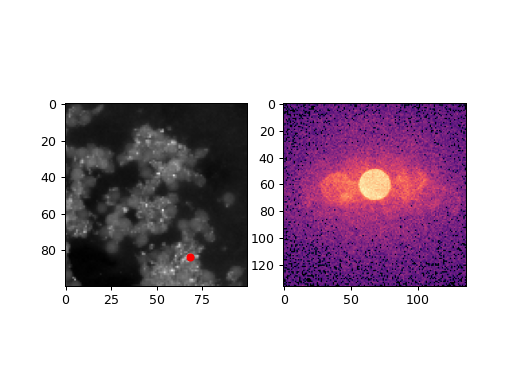

In [51]:
#extract one diffraction pattern

aa=84
bb=68

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(DF, cmap=plt.cm.gray)
ax[0].scatter(bb, aa,color='red', s=30)

DP=np.mean(NP_data[aa-1:aa+1,bb-1:bb+1,:,:,],axis=(0,1))**0.3

ax[1].imshow(DP, cmap='magma')

plt.show()

<IPython.core.display.Javascript object>


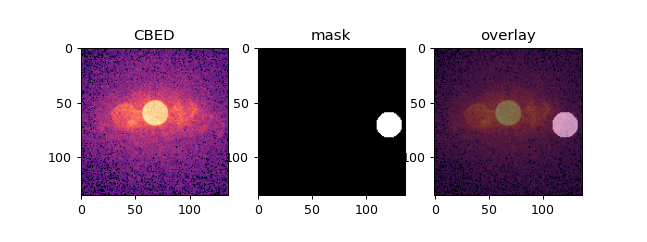

In [55]:
#create virtual aperature for one reflection 

#create mask
x, y = np.indices((meanCBED2.shape[0], meanCBED2.shape[1]))
mask_Au = (x - 71) ** 2 + (y-120) ** 2 < 12 ** 2

#plot mask to check alignment 
fig, ax = plt.subplots(ncols=3, figsize=(8,3))
ax[0].imshow(DP, cmap='magma')
ax[1].imshow(mask_Au, cmap='gray')

ax[2].imshow(DP, cmap='magma')
ax[2].imshow(mask_Au, cmap='gray', alpha=0.5)

ax[0].set_title('CBED')
ax[1].set_title('mask')
ax[2].set_title('overlay')
plt.show()



<IPython.core.display.Javascript object>


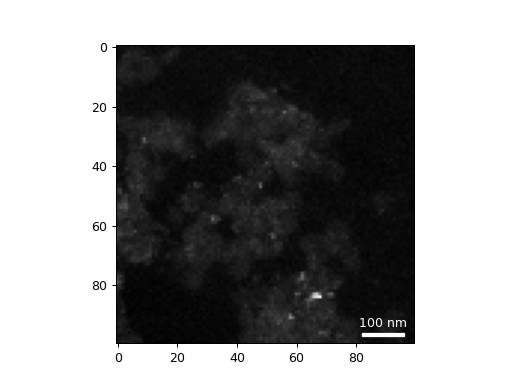

In [56]:
virtual_image=np.zeros((NP_data.shape[0],NP_data.shape[1]))

for i in range(0,int(NP_data.shape[2])):
    for j in range(0,int(NP_data.shape[3])):
        if mask_Au[i,j]:
            virtual_image=virtual_image+NP_data[:,:,i,j]
            
#plot BF image 
fig,ax=plt.subplots()
ax.imshow(virtual_image, cmap=plt.cm.gray)


#add scale bar
barsize =0.1/(scale*NP_data.shape[0]) 
scalebar = AnchoredSizeBar(transform=ax.transAxes, size=barsize, loc=4, label='100 nm',label_top='true',
                           borderpad=0.5, color='white', size_vertical=0.01, frameon=False)

ax.add_artist(scalebar)
    
    
#ax.axis('off') #uncomment to remove x and y axis tick marks
#plt.savefig('virtual.png',dpi=150, bbox_inches='tight', pad_inches=0.1) uncomment to save image to working directory
plt.show()